## Plotting Genes of interest under different Culture conditions after Pour2022Emergencepatterningdynamics


**GEO:** https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE189224

**Publication** Pour M, Kumar AS, Farag N, Bolondi A, Kretzmer H, Walther M, Wittler L, Meissner A, Nachman I. *Emergence and patterning dynamics of mouse-definitive endoderm.* iScience. 2021 Dec 6;25(1):103556. doi: 10.1016/j.isci.2021.103556. PMID: 34988400; PMCID: PMC8693470. 

**Status** 	Public on Dec 13, 2021

**Title** 	Emergence and patterning dynamics of mouse definitive endoderm

**Organism** 	Mus musculus

**Experiment type** 	Expression profiling by high throughput sequencing

**Summary** 	The segregation of *definitive endoderm* (DE) from bi-potent mesendoderm progenitors leads to the formation of two distinct germ layers. Dissecting DE commitment and onset has been challenging as it occurs within a narrow spatio-temporal window in the embryo. Here we employ a novel dual Bra/Sox17 reporter cell line to study DE onset dynamics. We find Sox17 expression initiates in a few isolated cells in vivo within a temporally restricted window. 

Using 2D and 3D in vitro models, we show that DE cells emerge from mesendoderm progenitors at a temporally regular, but spatially stochastic pattern, which is subsequently arranged by self-sorting of Sox17+ cells. A subpopulation of Bra-high cells commits to a Sox17+ fate independent of external Wnt signal. Self-sorting coincides with up-regulation of E-cadherin but is not necessary for DE differentiation or proliferation. Our in vivo and in vitro results highlight basic rules governing DE onset and patterning through the commonalities and differences between these systems.
  	
**Overall design** 	In this study, we analyzed the dynamics of Sox17 (marker of definitive endoderm) dynamics in vitro and in vivo. We show that majority of these cells originate from T+ population, and that the disperse pattern of Sox17+ cells is a cell-autonomous choice which is free of spatial feedback.
  	
**Contributor(s)** 	Pour M, Kumar AS, Farag N, Bolondi A, Kretzmer H, Walther M, Wittler L, Meissner A, Nachman I
Citation(s) 	

**Method**

**Differentiation assay**

Cells were cultured in *serum-free N2B27 media supplemented with LIF and and 2i* (3 mM CHIR99021 (WNT pathway activator; Inhibits GSK3) and
1 mM PD0325901 (MEK/ERK pathway inhibitor; Inhibits MEK)) for a minimum of 24 hours. 

Prior to **2D differentiation**, ESCs were fully dissociated to single cells and seeded at low density (~12,000 cells/cm^2) on gelatin-coated *plates in LIF 2i medium supplemented with 5% KSR*. 

Differentiation was induced a minimum of 18 h later by rinsing ESCs thoroughly with 1X PBS and changing to N2B27 media **without LIF 2i**. 

For **3D Embryoid bodies' aggregation**, single cells
were transferred to a low-adherent culture dish, allowing cells to randomly aggregate together in small clumps, in **N2B27 media without LIF 2i**. In both 2D and 3D differentiation protocols, *after 48hrs* in in N2B27, media was changed to *N2B27 media with CHIR99021 (3 mM, WNT pathway activator; Inhibits GSK3)*.

For *Wnt/Activin* signaling pathways interplay experiments, cells were supplemented with CHIR99021 (3 mM) or *IWP2 porcupine inhibitor (10mM)* or *Activin (20ng/mL)* or *SB-431542 Activin receptor inhibitor (10mM)*, as indicated in the relevant result. For movement inhibition, *ROCK inhibitor (Y-27632, 20mM)* was added at the described time points.


**Bulk RNA sequencing**

For Bulk RNA sequencing experiment, **EBs were differentiated for 48hrs after the addition of CHIR**, and were collected and sorted to three populations - Bra-GFP+ (ME), Bra-GFP+ Sox17-RFP+ (MEN), and Sox17-RFP+ (DE). Undifferentiated ESC cell line were served as a control.

Three independent differentiation assays and sorting were performed and serve as three replicates, analyzed together. Paired-end reads were aligned with STAR v2.5.1 using default options. Gene counts were quantified using featureCounts v1.6.3. For featureCounts, fragments were counted at the gene-name level. Alignment and gene counts were generated against the GRCm38/mm10 genome assembly. STAR v2.5.1 and GRCm38/mm10 were included with CellRanger 3.0.2.


#### load modules

In [34]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.cluster.hierarchy as sch
import seaborn as sns

import pylab
from pylab import *

#### load data

In [35]:
df_Pour = pd.read_table('./Pour2022Emergencepatterningdynamics/GSE189224_all_TPMs.txt.gz')
df_Pour[:2]

,#chr,start,end,gene_name,gene_ID,strand,ESC_rep1,ESC_rep2,ESC_rep3,Sox17_rep1,Sox17_rep2,Sox17_rep3,T_rep1,T_rep2,T_rep3,Sox17_T_rep1,Sox17_T_rep2,Sox17_T_rep3
0,chr1,3073253,3074322,4933401J01Rik,ENSMUSG00000102693.1,+,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,chr1,3102016,3102125,Gm26206,ENSMUSG00000064842.1,+,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
df_Pour = df_Pour.set_index('gene_name').sort_values(by=['gene_name'], ascending=[True], inplace=False)
df_Pour[:2]

,#chr,start,end,gene_ID,strand,ESC_rep1,ESC_rep2,ESC_rep3,Sox17_rep1,Sox17_rep2,Sox17_rep3,T_rep1,T_rep2,T_rep3,Sox17_T_rep1,Sox17_T_rep2,Sox17_T_rep3
gene_name,,,,,,,,,,,,,,,,,
0610005C13Rik,chr7,45567794,45575327,ENSMUSG00000109644.1,-,0.591258,0.250095,0.265313,0.0,0.0,0.0,0.056542,0.0,0.0,0.0,0.0,0.0
0610006L08Rik,chr7,74818818,74853813,ENSMUSG00000108652.1,-,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [37]:
rmdup_Pour = df_Pour.drop_duplicates()
print(len(rmdup_Pour))

54480


In [38]:
rmdup_Pour = rmdup_Pour.sort_values(by=['ESC_rep1'], ascending=[False], inplace=False)
rmdup_Pour[:2]

,#chr,start,end,gene_ID,strand,ESC_rep1,ESC_rep2,ESC_rep3,Sox17_rep1,Sox17_rep2,Sox17_rep3,T_rep1,T_rep2,T_rep3,Sox17_T_rep1,Sox17_T_rep2,Sox17_T_rep3
gene_name,,,,,,,,,,,,,,,,,
Eef1a1,chr9,78478449,78489151,ENSMUSG00000037742.14,-,11138.294922,11099.281250,11103.764648,18797.513672,19497.671875,19134.296875,19438.003906,19652.541016,19642.888672,19452.156250,19823.136719,19381.701172
Gm23935,chr16,11144125,11144181,ENSMUSG00000076258.1,+,8007.421875,8336.801758,9317.495117,5335.486816,6853.468262,6575.447754,5206.990234,6436.475098,7721.571289,5453.884766,5706.959961,4659.294434


In [39]:
loc_Pour = rmdup_Pour.loc[:,['ESC_rep1',
                             'ESC_rep2',
                             'ESC_rep3',
                             'Sox17_rep1',
                             'Sox17_rep2',
                             'Sox17_rep3',
                             'T_rep1',
                             'T_rep2',
                             'T_rep3',
                             'Sox17_T_rep1',
                             'Sox17_T_rep2',
                             'Sox17_T_rep3',
                            ]]
loc_Pour[:2]

,ESC_rep1,ESC_rep2,ESC_rep3,Sox17_rep1,Sox17_rep2,Sox17_rep3,T_rep1,T_rep2,T_rep3,Sox17_T_rep1,Sox17_T_rep2,Sox17_T_rep3
gene_name,,,,,,,,,,,,
Eef1a1,11138.294922,11099.281250,11103.764648,18797.513672,19497.671875,19134.296875,19438.003906,19652.541016,19642.888672,19452.156250,19823.136719,19381.701172
Gm23935,8007.421875,8336.801758,9317.495117,5335.486816,6853.468262,6575.447754,5206.990234,6436.475098,7721.571289,5453.884766,5706.959961,4659.294434


## Rename Column names

In [40]:
colum_names =['ESC 1',
              'ESC 2',
              'ESC 3',
              'Sox17 1',
              'Sox17 2',
              'Sox17 3',
              'T 1',
              'T 2',
              'T 3',
              'Sox17+T 1',
              'Sox17+T 2',
              'Sox17+T 3'
             ]

loc_Pour = loc_Pour.set_axis(colum_names, axis=1)

print(loc_Pour[:0])
print(len(loc_Pour))

Empty DataFrame
Columns: [ESC 1, ESC 2, ESC 3, Sox17 1, Sox17 2, Sox17 3, T 1, T 2, T 3, Sox17+T 1, Sox17+T 2, Sox17+T 3]
Index: []
54480


## Top 50

In [41]:
#loc_Pour_sox_t = loc_Pour.sort_values(by=['Sox17_T_rep1'], ascending=[False], inplace=False)
#loc_Pour_sox_t[:2]

In [42]:
top50_Heatmap = loc_Pour.head(50)
top50_Heatmap[:2]

,ESC 1,ESC 2,ESC 3,Sox17 1,Sox17 2,Sox17 3,T 1,T 2,T 3,Sox17+T 1,Sox17+T 2,Sox17+T 3
gene_name,,,,,,,,,,,,
Eef1a1,11138.294922,11099.281250,11103.764648,18797.513672,19497.671875,19134.296875,19438.003906,19652.541016,19642.888672,19452.156250,19823.136719,19381.701172
Gm23935,8007.421875,8336.801758,9317.495117,5335.486816,6853.468262,6575.447754,5206.990234,6436.475098,7721.571289,5453.884766,5706.959961,4659.294434


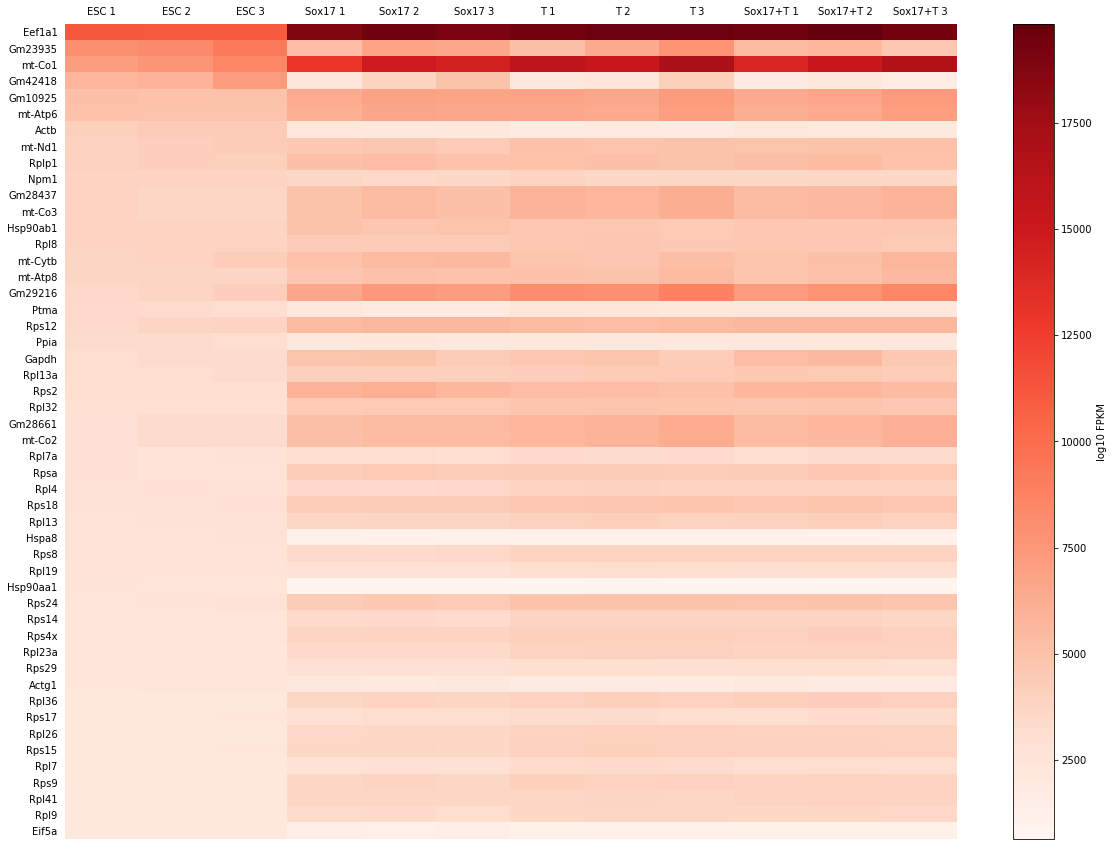

In [43]:
df_plotme = top50_Heatmap#.sort_values(by=['gene_name'], ascending=[True], inplace=False)

column_labels = df_plotme.index #CGNP.axes[0]
row_labels = df_plotme.columns[:] #CGNP.axes[1]
data = df_plotme.values[:,:]

# figure size
#plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(figsize=(20, 15))

# color scheme
heatmap = ax.pcolormesh(data, cmap='Reds', alpha=1) # plt.cm.bwr
    
# add colorbar
fig.colorbar(heatmap, ax=ax, label='log10 FPKM')#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
#plt.xticks(rotation=90)

#no frame
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1line.set_visible(False)
    t.tick2line.set_visible(False)
for t in ax.yaxis.get_major_ticks():
    t.tick1line.set_visible(False)
    t.tick2line.set_visible(False)
    
plt.show()
#fig.savefig("RIC-Heatmap.jpg", dpi=300)
#fig.savefig("Prot15-Heatmap.svg", dpi=300)
#fig.savefig("RIC-Heatmap.pdf", dpi=300)

In [44]:
log10_top50_Heatmap = np.log10(top50_Heatmap)
log10_top50_Heatmap[:2]

,ESC 1,ESC 2,ESC 3,Sox17 1,Sox17 2,Sox17 3,T 1,T 2,T 3,Sox17+T 1,Sox17+T 2,Sox17+T 3
gene_name,,,,,,,,,,,,
Eef1a1,4.046819,4.045295,4.045470,4.274100,4.289983,4.281813,4.288652,4.293419,4.293205,4.288968,4.297172,4.287392
Gm23935,3.903493,3.920999,3.969299,3.727174,3.835910,3.817925,3.716587,3.808648,3.887706,3.736706,3.756405,3.668320


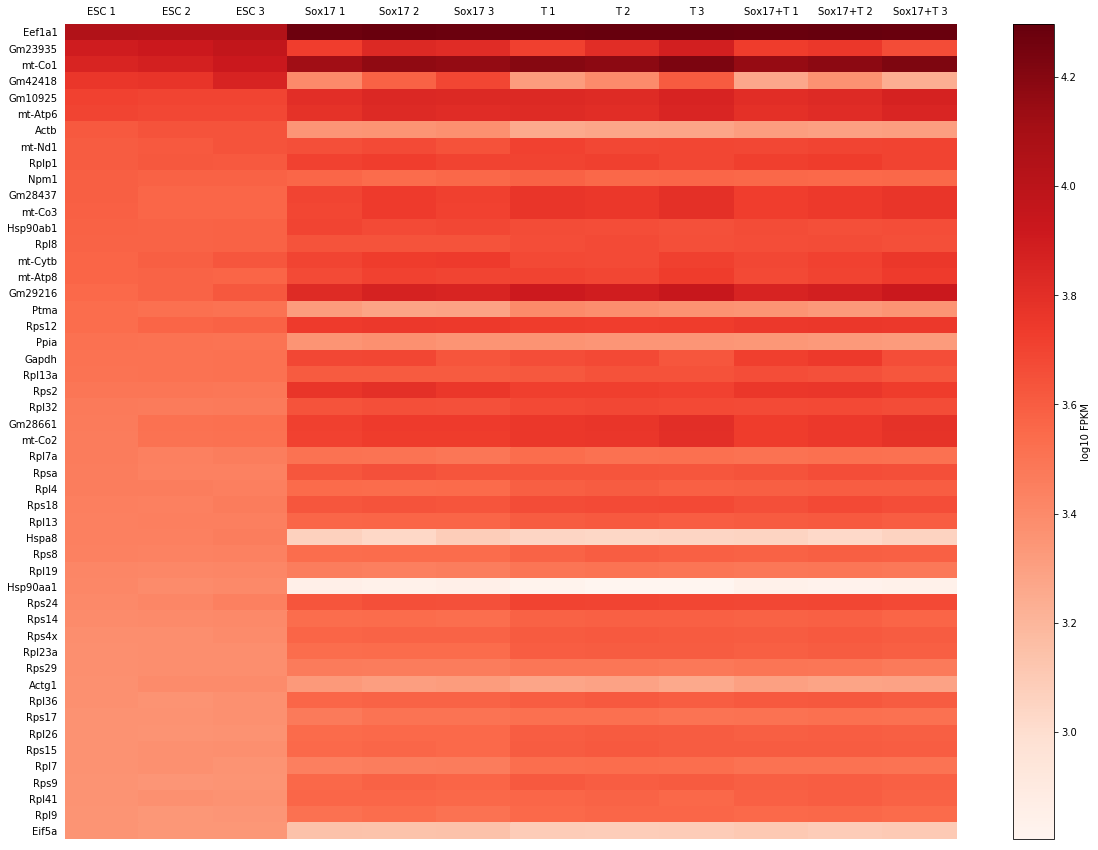

In [45]:
df_plotme = log10_top50_Heatmap#

column_labels = df_plotme.index #CGNP.axes[0]
row_labels = df_plotme.columns[:] #CGNP.axes[1]
data = df_plotme.values[:,:]

# figure size
#plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(figsize=(20, 15))

# color scheme
heatmap = ax.pcolormesh(data, cmap='Reds', alpha=1) # plt.cm.bwr
    
# add colorbar
fig.colorbar(heatmap, ax=ax, label='log10 FPKM')#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
#plt.xticks(rotation=90)

#no frame
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1line.set_visible(False)
    t.tick2line.set_visible(False)
for t in ax.yaxis.get_major_ticks():
    t.tick1line.set_visible(False)
    t.tick2line.set_visible(False)
    
plt.show()
#fig.savefig("RIC-Heatmap.jpg", dpi=300)
#fig.savefig("Prot15-Heatmap.svg", dpi=300)
#fig.savefig("RIC-Heatmap.pdf", dpi=300)

## filter for Genes of interest

In [46]:
labels = ['Dppa3',
          'Oct4', 'Pou5f1',
          'Zfp42',
          'Dppa2',
          'Nanog',
          'Zfp982', 'Gm13152',
          'Sox2',
          'Yap1',
          'Sox17', # definitive Endoderm
          'Foxa2', # definitive  Endoderm
          'Lhx1',  # early Mesoderm
          'Mixl1', # early Mesoderm
          'T', 'Brachyury', 'TBXT' # mesoderm formation and differentiation
          #'CDH1', 'E-cad', 'Cadherin 1', 'CD324', 'Arc-1'
         ]

df_Heatmap = loc_Pour.loc[loc_Pour.index.intersection(labels),:]
df_Heatmap

,ESC 1,ESC 2,ESC 3,Sox17 1,Sox17 2,Sox17 3,T 1,T 2,T 3,Sox17+T 1,Sox17+T 2,Sox17+T 3
gene_name,,,,,,,,,,,,
Pou5f1,1396.149658,1357.548340,1348.067993,6.029019,5.082415,5.964166,108.473022,92.535248,74.879440,26.711828,26.214481,22.336464
Zfp42,532.731079,516.531982,497.160034,1.144367,0.922167,0.475646,2.529615,1.649622,2.672914,1.597431,1.354331,1.580466
Nanog,451.040558,451.218170,418.266785,4.818901,2.994411,5.693254,13.248507,11.268712,15.291544,13.242635,8.871234,16.158772
Sox2,359.180634,353.729187,341.330872,0.963877,0.536883,1.423331,4.820600,3.925659,4.253352,1.220252,1.314341,1.462573
Dppa2,193.333313,179.697769,178.786804,0.092338,0.000000,0.000000,0.000000,0.054874,0.022267,0.045439,0.000000,0.000000
Yap1,118.347275,117.617973,115.423347,104.538582,101.912231,97.861130,120.652191,121.914360,120.716583,108.398239,107.019264,120.037865
Zfp982,47.472897,42.725086,41.777504,4.347436,3.637009,4.341190,7.450519,6.965129,6.854646,5.267259,5.247194,5.600647
Dppa3,5.791279,5.752759,6.578400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Foxa2,1.072401,0.585877,1.245903,83.216980,76.899124,90.482010,23.010017,19.317774,36.237942,58.179276,49.157516,71.920746


In [47]:
len(df_Heatmap)

13

### rename Genes

In [48]:
df_Heatmap = df_Heatmap.rename({'Pou5f1':'Oct4', 'Gm13152':'Zfp982'})
df_Heatmap

,ESC 1,ESC 2,ESC 3,Sox17 1,Sox17 2,Sox17 3,T 1,T 2,T 3,Sox17+T 1,Sox17+T 2,Sox17+T 3
gene_name,,,,,,,,,,,,
Oct4,1396.149658,1357.548340,1348.067993,6.029019,5.082415,5.964166,108.473022,92.535248,74.879440,26.711828,26.214481,22.336464
Zfp42,532.731079,516.531982,497.160034,1.144367,0.922167,0.475646,2.529615,1.649622,2.672914,1.597431,1.354331,1.580466
Nanog,451.040558,451.218170,418.266785,4.818901,2.994411,5.693254,13.248507,11.268712,15.291544,13.242635,8.871234,16.158772
Sox2,359.180634,353.729187,341.330872,0.963877,0.536883,1.423331,4.820600,3.925659,4.253352,1.220252,1.314341,1.462573
Dppa2,193.333313,179.697769,178.786804,0.092338,0.000000,0.000000,0.000000,0.054874,0.022267,0.045439,0.000000,0.000000
Yap1,118.347275,117.617973,115.423347,104.538582,101.912231,97.861130,120.652191,121.914360,120.716583,108.398239,107.019264,120.037865
Zfp982,47.472897,42.725086,41.777504,4.347436,3.637009,4.341190,7.450519,6.965129,6.854646,5.267259,5.247194,5.600647
Dppa3,5.791279,5.752759,6.578400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Foxa2,1.072401,0.585877,1.245903,83.216980,76.899124,90.482010,23.010017,19.317774,36.237942,58.179276,49.157516,71.920746


## Plott heatmap for the Genes of interest

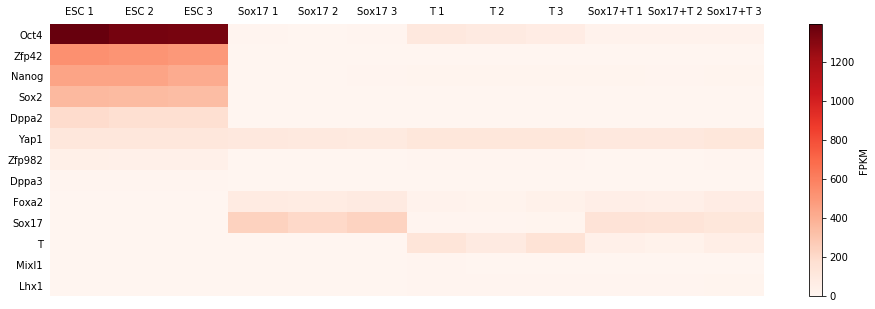

In [49]:
df_plotme = df_Heatmap

column_labels = df_plotme.index #CGNP.axes[0]
row_labels = df_plotme.columns[:] #CGNP.axes[1]
data = df_plotme.values[:,:]

# figure size
#plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(figsize=(16, 5))

# color scheme
heatmap = ax.pcolormesh(data, cmap='Reds', alpha=1) # plt.cm.bwr
    
# add colorbar
fig.colorbar(heatmap, ax=ax, label='FPKM')#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
#plt.xticks(rotation=90)

#no frame
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1line.set_visible(False)
    t.tick2line.set_visible(False)
for t in ax.yaxis.get_major_ticks():
    t.tick1line.set_visible(False)
    t.tick2line.set_visible(False)
    
plt.show()
#fig.savefig("RIC-Heatmap.jpg", dpi=300)
fig.savefig("FPKM-Heatmap-Pour2022Emergencepatterningdynamics.svg", dpi=300)
fig.savefig("FPKM-Heatmap-Pour2022Emergencepatterningdynamics.png", dpi=300)
#fig.savefig("RIC-Heatmap.pdf", dpi=300)

## log10 

In [50]:
log10_Heatmap = np.log10(df_Heatmap + 0.0000001)
log10_Heatmap

,ESC 1,ESC 2,ESC 3,Sox17 1,Sox17 2,Sox17 3,T 1,T 2,T 3,Sox17+T 1,Sox17+T 2,Sox17+T 3
gene_name,,,,,,,,,,,,
Oct4,3.144932,3.132755,3.129712,0.780247,0.706070,0.775550,2.035322,1.966307,1.874363,1.426704,1.418541,1.349014
Zfp42,2.726508,2.713097,2.696496,0.058565,-0.035190,-0.322716,0.403054,0.217384,0.426985,0.203422,0.131725,0.198785
Nanog,2.654216,2.654387,2.621453,0.682948,0.476311,0.755361,1.122167,1.051874,1.184451,1.121974,0.947984,1.208408
Sox2,2.555313,2.548671,2.533176,-0.015978,-0.270120,0.153306,0.683101,0.593913,0.628731,0.086450,0.118708,0.165118
Dppa2,2.286307,2.254543,2.252335,-1.034619,-7.000000,-7.000000,-7.000000,-1.260633,-1.652336,-1.342570,-7.000000,-7.000000
Yap1,2.073158,2.070474,2.062294,2.019277,2.008226,1.990610,2.081535,2.086055,2.081767,2.035022,2.029462,2.079318
Zfp982,1.676446,1.630683,1.620942,0.638233,0.560744,0.637609,0.872187,0.842929,0.835985,0.721585,0.719927,0.748238
Dppa3,0.762774,0.759876,0.818120,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000
Foxa2,0.030357,-0.232193,0.095484,1.920212,1.885921,1.956562,1.361917,1.285957,1.559164,1.764768,1.691590,1.856854


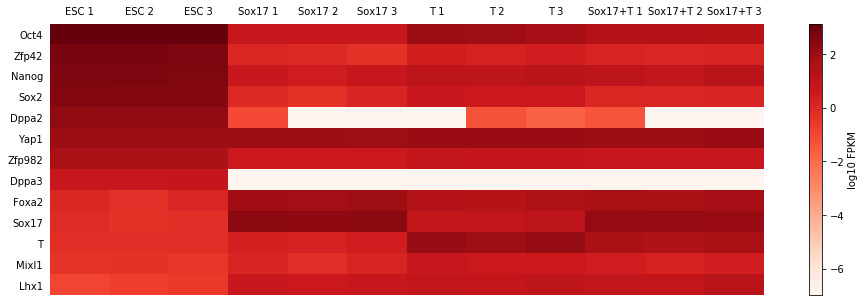

In [51]:
df_plotme = log10_Heatmap
103556
column_labels = df_plotme.index #CGNP.axes[0]
row_labels = df_plotme.columns[:] #CGNP.axes[1]
data = df_plotme.values[:,:]

# figure size
#plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(figsize=(16, 5))

# color scheme
heatmap = ax.pcolormesh(data, cmap='Reds', alpha=1) # plt.cm.bwr
    
# add colorbar
fig.colorbar(heatmap, ax=ax, label='log10 FPKM')#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
#plt.xticks(rotation=90)

#no frame
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1line.set_visible(False)
    t.tick2line.set_visible(False)
for t in ax.yaxis.get_major_ticks():
    t.tick1line.set_visible(False)
    t.tick2line.set_visible(False)

plt.show()
#fig.savefig("RIC-Heatmap.jpg", dpi=300)
fig.savefig("log10-FPKM-Heatmap-Pour2022Emergencepatterningdynamics.svg", dpi=300)
fig.savefig("log10-FPKM-Heatmap-Pour2022Emergencepatterningdynamics.png", dpi=300)
#fig.savefig("RIC-Heatmap.pdf", dpi=300)

## Clustering
with seaborn

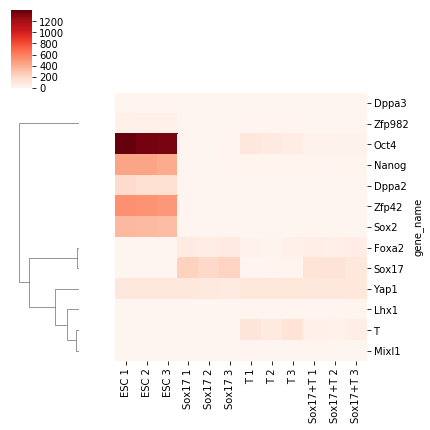

In [52]:
sns.clustermap(df_Heatmap, 
               col_cluster=False,
               metric="correlation",
               #standard_scale=1,
               cmap='Reds',
               figsize=(6, 6)
               #yticklabels=False
              )
plt.savefig("FPKM-Heatmap-Pour2022Emergencepatterningdynamics-cluster.svg", dpi=300)
plt.savefig("FPKM-Heatmap-Pour2022Emergencepatterningdynamics-cluster.png", dpi=300)

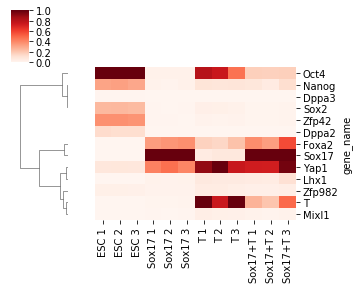

In [57]:
sns.clustermap(df_Heatmap, 
               col_cluster=False,
               metric="correlation",
               standard_scale=1,
               cmap='Reds',
               figsize=(5, 4)
               #yticklabels=False
              )
plt.savefig("FPKM-Heatmap-Pour2022Emergencepatterningdynamics-cluster-to1.svg", dpi=300)
plt.savefig("FPKM-Heatmap-Pour2022Emergencepatterningdynamics-cluster-to1.png", dpi=300)

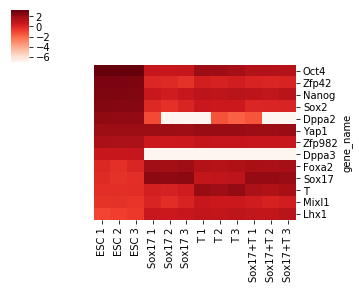

In [69]:
sns.clustermap(log10_Heatmap, 
               row_cluster=False,
               col_cluster=False,
               #standard_scale=1,
               cmap='Reds',
               figsize=(5, 4),
               #yticklabels=False
              )
plt.savefig("log10-FPKM-Heatmap-Pour2022Emergencepatterningdynamics-cluster.svg", dpi=300)
plt.savefig("log10-FPKM-Heatmap-Pour2022Emergencepatterningdynamics-cluster.png", dpi=300)
             
           


### conditions 

**Pour2022Emergencepatterningdynamics Fig.: S5**
*RNAseq results of undifferentiated ESCs and differentiated **EBs**, 48hrs post CHIR addition, sorted to Bra-GFP+ (ME), Bra-GFP+ Sox17-RFP+ (MEN), and Sox17-RFP+ (DE) populations, shows high reproducibility between the three independent replicates.*
